In [1]:
#NAME MOHAN MOLLI

In [2]:
#Import Required Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Upload dataset
df=pd.read_csv("UPI_Sample_Dataset.csv")
df

,Date,User ID,Transaction ID,Transaction Type,Transaction Value,Revenue,User Age,User Gender,City,Device Used,User Retention,Time of Day,Day of the Week,User Type
0,16:39.4,User_52,Txn_1,Recharge,2990.60,38.79,52.0,Male,Pune,Tablet,Retained,15.0,Monday,New
1,16:39.4,User_93,Txn_2,Peer-to-Peer,2022.00,73.31,43.0,Other,Delhi,Tablet,New,8.0,Wednesday,Returning
2,16:39.4,User_15,Txn_3,Recharge,2243.63,33.23,25.0,Other,Chennai,Desktop,New,8.0,Wednesday,New
3,16:39.4,User_72,Txn_4,Recharge,4530.38,58.81,53.0,Male,Chennai,Desktop,Retained,5.0,Saturday,New
4,16:39.4,User_61,Txn_5,Recharge,1806.45,50.22,47.0,Other,Hyderabad,Desktop,Churned,10.0,Monday,Returning
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,NaN,NaN,Txn_396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Churned,NaN,Friday,NaN
401,NaN,NaN,Txn_397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retained,NaN,Monday,NaN
402,NaN,NaN,Txn_398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retained,NaN,Tuesday,NaN
403,NaN,NaN,Txn_399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Business Problem

In [4]:
# Title : Analysis of UPI Transaction Patterns to Improve Revenue and User Retention

In [5]:
# Domain : Financial


In [6]:
# Description :The organization needs to analyze UPI transaction data to understand user behavior, revenue patterns, and retention trends.

In [7]:
# Objective :The primary objective of this project is to perform Exploratory Data Analysis (EDA) on UPI transaction data to generate actionable business insights. 
             #Specifically, the project aims to:
# 1.Analyze transaction behavior across cities, devices, and time periods
# 2.Identify high-revenue transaction types and user segments
# 3.Compare transaction patterns between retained and churned users
# 4.Understand factors influencing transaction value and revenue
# 5.Support data-driven decision-making for improving user retention and revenue growth

# Data Understanding and Exploration

In [8]:
#Top 5 rows
df.head()

,Date,User ID,Transaction ID,Transaction Type,Transaction Value,Revenue,User Age,User Gender,City,Device Used,User Retention,Time of Day,Day of the Week,User Type
0,16:39.4,User_52,Txn_1,Recharge,2990.60,38.79,52.0,Male,Pune,Tablet,Retained,15.0,Monday,New
1,16:39.4,User_93,Txn_2,Peer-to-Peer,2022.00,73.31,43.0,Other,Delhi,Tablet,New,8.0,Wednesday,Returning
2,16:39.4,User_15,Txn_3,Recharge,2243.63,33.23,25.0,Other,Chennai,Desktop,New,8.0,Wednesday,New
3,16:39.4,User_72,Txn_4,Recharge,4530.38,58.81,53.0,Male,Chennai,Desktop,Retained,5.0,Saturday,New
4,16:39.4,User_61,Txn_5,Recharge,1806.45,50.22,47.0,Other,Hyderabad,Desktop,Churned,10.0,Monday,Returning


In [9]:
#Bottom 5 rows
df.tail() 

,Date,User ID,Transaction ID,Transaction Type,Transaction Value,Revenue,User Age,User Gender,City,Device Used,User Retention,Time of Day,Day of the Week,User Type
400,NaN,NaN,Txn_396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Churned,NaN,Friday,NaN
401,NaN,NaN,Txn_397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retained,NaN,Monday,NaN
402,NaN,NaN,Txn_398,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Retained,NaN,Tuesday,NaN
403,NaN,NaN,Txn_399,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
404,NaN,NaN,Txn_400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
df.shape

(405, 14)

In [12]:
df.dtypes

Date                  object
User ID               object
Transaction ID        object
Transaction Type      object
Transaction Value    float64
Revenue              float64
User Age             float64
User Gender           object
City                  object
Device Used           object
User Retention        object
Time of Day          float64
Day of the Week       object
User Type             object
dtype: object

In [13]:
df.describe()

,Transaction Value,Revenue,User Age,Time of Day
count,400.000000,400.000000,400.000000,400.000000
mean,2396.698200,54.188300,40.822500,11.557500
std,1385.685822,28.239135,14.116983,6.966565
min,122.700000,5.610000,18.000000,0.000000
25%,1124.017500,28.455000,28.000000,5.000000
50%,2312.490000,56.450000,41.000000,11.000000
75%,3526.560000,78.375000,53.000000,18.000000
max,4984.680000,99.800000,64.000000,23.000000


In [14]:
df.isnull().sum()

Date                 5
User ID              5
Transaction ID       0
Transaction Type     5
Transaction Value    5
Revenue              5
User Age             5
User Gender          5
City                 5
Device Used          5
User Retention       2
Time of Day          5
Day of the Week      2
User Type            5
dtype: int64

In [16]:
# replacing null values with median in the Transaction value, Revenue, User Age Columns
df['Transaction Value'].fillna(df['Transaction Value'].median(), inplace=True)
df['Revenue'].fillna(df['Revenue'].median(), inplace=True)
df['User Age'].fillna(df['User Age'].median(), inplace=True)

In [17]:
# replacing null values with mode in the Transaction Type, City, Device Used, User Retention, Time of the Day, User Type
df['Transaction Type'].fillna(df['Transaction Type'].mode()[0], inplace=True)
df['City'].fillna(df['City'].mode()[0], inplace=True)
df['Device Used'].fillna(df['Device Used'].mode()[0], inplace=True)
df['User Retention'].fillna(df['User Retention'].mode()[0], inplace=True)
df['Time of Day'].fillna(df['Time of Day'].mode()[0], inplace=True)
df['User Type'].fillna(df['User Type'].mode()[0], inplace=True)


In [18]:
# rows where date or user id has null(NaN) were removed
df.dropna(subset=['Date', 'User ID'], inplace=True)

In [19]:
df.isnull().sum()

Date                 0
User ID              0
Transaction ID       0
Transaction Type     0
Transaction Value    0
Revenue              0
User Age             0
User Gender          0
City                 0
Device Used          0
User Retention       0
Time of Day          0
Day of the Week      0
User Type            0
dtype: int64

In [20]:
df.duplicated().sum()

0

# Univariate Analysis

## Transaction Type Distribution

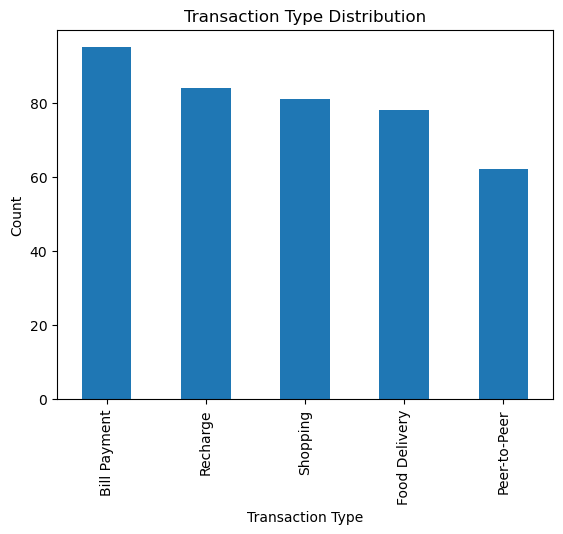

In [21]:
# Plot to analyze the frequency of each transaction type in the dataset
plt.figure()
df['Transaction Type'].value_counts().plot(kind='bar')
plt.title("Transaction Type Distribution")
plt.xlabel("Transaction Type")
plt.ylabel("Count")
plt.show()

In [22]:
#Observation
# 1.Bill Payments and Recharges are the most frequent transaction types
# 2.Shopping and Food Delivery show strong user engagement
# 3.Peer-to-Peer (P2P) transactions have the lowest transaction count

## Transaction Value Distribution

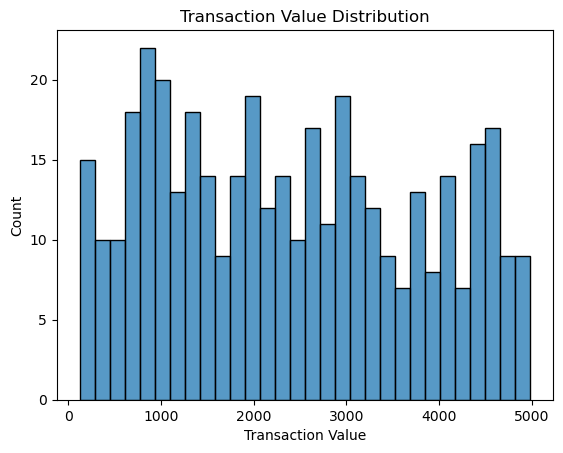

In [23]:
#  histogram to visualize the distribution of transaction values.
plt.figure()
sns.histplot(df['Transaction Value'], bins=30)
plt.title("Transaction Value Distribution")
plt.show()

In [24]:
# Observation
# 1.Transaction values range approximately from ₹100 to ₹5,000
# 2.Majority of transactions fall in the ₹500–₹3,000 range
# 3.Presence of high-value transactions (>₹4,000) indicates premium or power users

## User Retention Status

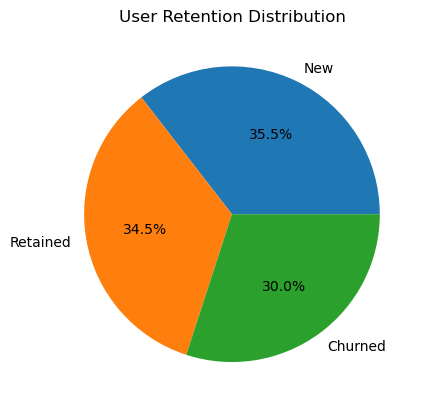

In [25]:
# pie chart showing the percentage distribution of user retention categories.
plt.figure()
df['User Retention'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("User Retention Distribution")
plt.ylabel("")
plt.show()

In [26]:
# Observation
# 1.New Users: 35.5%
# 2.Retained Users: 34.5%
# 3.Churned Users: 30%

# Bivariate Analysis

## Transaction Value vs User Retention

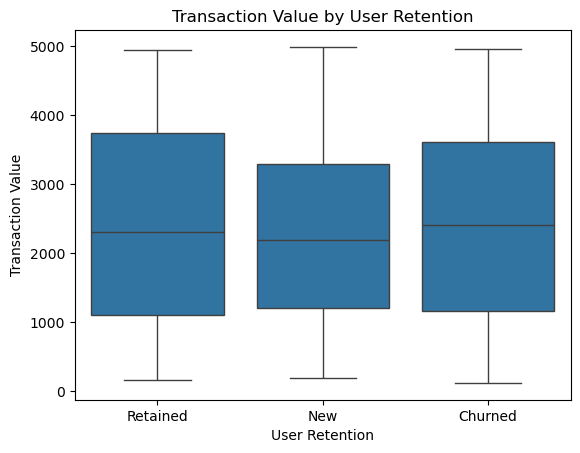

In [27]:
# box plot to compare transaction value distributions across user retention categories.
plt.figure()
sns.boxplot(x='User Retention', y='Transaction Value', data=df)
plt.title("Transaction Value by User Retention")
plt.show()

In [28]:
#Observation
# 1.Retained users have higher median transaction values
# 2.New users show comparatively lower transaction values

## Revenue by Transaction Type

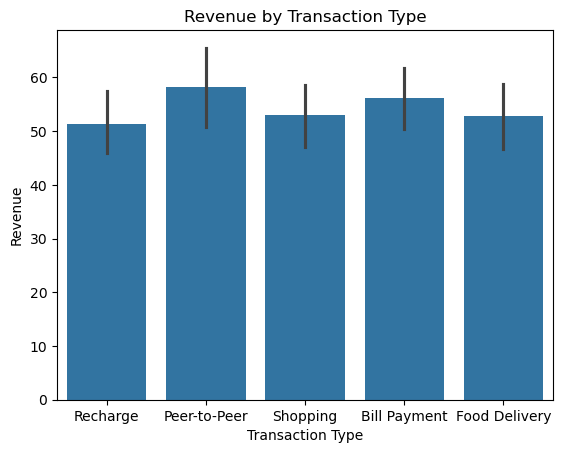

In [29]:
# bar chart to compare total revenue across different transaction types.
plt.figure()
sns.barplot(x='Transaction Type', y='Revenue', data=df)
plt.title("Revenue by Transaction Type")
plt.show()

In [30]:
#Observation
# 1.Peer-to-Peer and Bill Payment transactions generate the highest revenue
# 2.Recharge transactions generate comparatively lower revenue

## Revenue by Cities

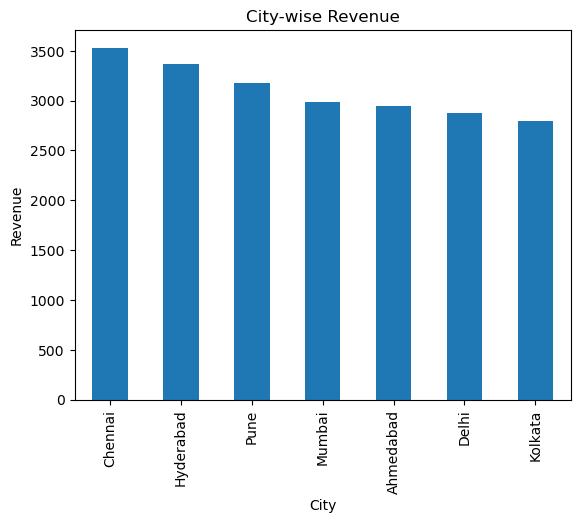

In [31]:
# bar chart calculates total revenue per city 
city_revenue = df.groupby('City')['Revenue'].sum().sort_values(ascending=False)

plt.figure()
city_revenue.plot(kind='bar')
plt.title("City-wise Revenue")
plt.xlabel("City")
plt.ylabel("Revenue")
plt.show()


In [32]:
#Observation
# 1.Chennai and Hyderabad generate the highest revenue
# 2.Kolkata contributes the lowest revenue among the listed cities

# Multivariate Analysis

## Device Used VS Transaction Type

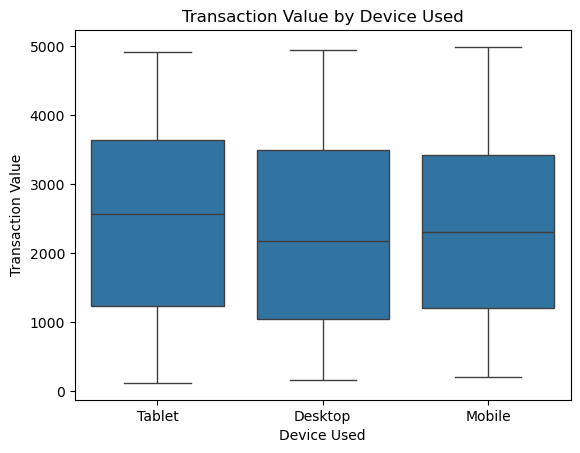

In [33]:
# box plot to compare transaction value distributions across different devices.
plt.figure()
sns.boxplot(x='Device Used', y='Transaction Value', data=df)
plt.title("Transaction Value by Device Used")
plt.show()

In [34]:
#Observation
# 1.Tablet users show slightly higher median transaction values
# 2.Desktop and Mobile users display similar patterns with wider variation

## Transaction activity by Day of week

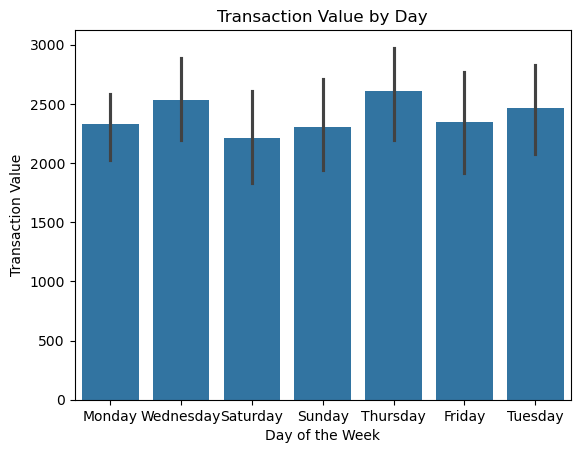

In [35]:
# bar chart to show how transaction values vary across days of the week.
plt.figure()
sns.barplot(x='Day of the Week', y='Transaction Value', data=df)
plt.title("Transaction Value by Day")
plt.show()

In [36]:
#Observation
# 1.Wednesday and Thursday show the highest average transaction values
# 2.Saturday has the lowest average transaction value

## Correlation Analysis

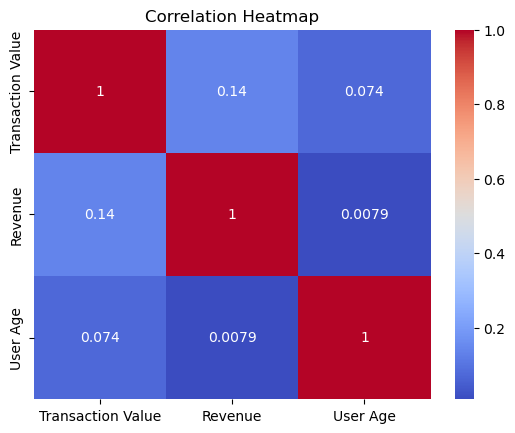

In [37]:
# heatmap to visualize correlations between transaction value, revenue, and user age.
plt.figure()
sns.heatmap(df[['Transaction Value', 'Revenue', 'User Age']].corr(),
            annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

In [38]:
#Observation
# 1.Transaction Value and Revenue show a weak positive correlation (~0.14)
# 2.User Age has minimal correlation with Transaction Value or Revenue

#  Business Insights

In [41]:
#Insights

# 1. Bill Payments and Recharges dominate transaction types, while P2P has the lowest usage.
# 2. Most transactions fall in ₹500–₹3,000, with a small segment of high-value users contributing significantly.
# 3. New, retained, and churned users are fairly balanced, but churn is notable.
# 4. Retained users consistently have higher transaction values than new users.
# 5. Peer-to-Peer and Bill Payment transactions generate the highest revenue.
# 6. Revenue is concentrated in major cities like Chennai and Hyderabad.
# 7. Tablet users show slightly higher median transaction values compared to other devices.
# 8. Mid-week days, especially Wednesday and Thursday, have higher average transaction values.
# 9.Transaction value and revenue are weakly correlated, and user age has minimal impact.

# Final Conclusion

In [ ]:
# The analysis indicates that bill payments, recharges, and P2P transactions, along with high-value and retained users, are the primary revenue drivers. 
# Focusing on user retention, key transaction types, and revenue-rich cities like Chennai and Hyderabad can significantly enhance business performance.